# LOGISTIC REGRESSION FROM SCRATCH IMPLEMENTATION

## 1. IMPORTING LIBRARIES
WE WILL USE ONLY NUMPY, PANDAS, AND MATPLOTLIB/SEABORN. <br>NO SKLEARN ALLOWED.

In [1]:
# IMPORT NUMERICAL COMPUTATION LIBRARY
import numpy as np

# IMPORT DATA HANDLING LIBRARY
import pandas as pd

# IMPORT VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

## VISUALIZATION STYLE

In [2]:
# SETTING UP THE VISUALIZATION STYLE GLOBALLY TO MATCH YOUR REQUIRED FORMAT
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

## LOADING DATA
READING THE DATA FROM CSV FILES.

In [3]:
# LOADING DATA
# IF HEADERS EXIST, REMOVE 'header=None'.

# LOAD X DATA FROM CSV FILE
X_raw = pd.read_csv('DATA/logisticX.csv', header=None).values

# LOAD Y DATA FROM CSV FILE
y_raw = pd.read_csv('DATA/logisticY.csv', header=None).values

In [4]:
# RESHAPING Y TO ENSURE IT IS A COLUMN VECTOR (M, 1)
y_data = y_raw.reshape(-1, 1)

# CHECKING SHAPE
print(f"X SHAPE --> {X_raw.shape}")
print(f"Y SHAPE --> {y_data.shape}")

X SHAPE --> (100, 2)
Y SHAPE --> (100, 1)


## PREPROCESSING DATA
WE WILL NORMALIZE THE DATA AND ADD AN INTERCEPT TERM (BIAS) TO X.

In [5]:
# NORMALIZATION (MIN-MAX SCALING)
# THIS IS CRUCIAL FOR GRADIENT DESCENT CONVERGENCE
# MATH: X_norm = (X - min) / (max - min)

X_min = np.min(X_raw, axis = 0)
X_max = np.max(X_raw, axis = 0)
X_norm = (X_raw - X_min) / (X_max - X_min)

# 🔍 NORMALIZATION STRATEGY: MIN-MAX VS. Z-SCORE

IN OUR **[LINEAR REGRESSION](https://github.com/DaRkSouL36/LinearRegression)** PROJECT, WE UTILIZED **Z-SCORE NORMALIZATION (STANDARDIZATION)**. HOWEVER, FOR **[LOGISTIC REGRESSION](https://github.com/DaRkSouL36/LogisticRegression)**, WE HAVE OPTED FOR **MIN-MAX NORMALIZATION**.


HERE IS THE MATHEMATICAL AND LOGICAL REASONING BEHIND THIS CHOICE.

---

## THE MATHEMATICAL FORMULAS

### **OPTION A: Z-SCORE (STANDARDIZATION)**
THIS CENTERS THE DATA AROUND 0 WITH A STANDARD DEVIATION OF 1. IT IS IDEAL WHEN DATA FOLLOWS A GAUSSIAN (BELL CURVE) DISTRIBUTION.
$$
X_{norm} = \frac{X - \mu}{\sigma}
$$
> *RESULTING RANGE:* ROUGHLY $[-3, +3]$ (UNBOUNDED).

### **OPTION B: MIN-MAX (NORMALIZATION)**
THIS RESCALES THE FEATURES TO A FIXED RANGE OF $[0, 1]$. BEST WHEN DATA DOES NOT FOLLOW A NORMAL DISTRIBUTION OR HAS A BOUNDED RANGE.
$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$
> *RESULTING RANGE:* STRICTLY $[0, 1]$.

---

## WHY MIN-MAX FOR LOGISTIC REGRESSION?

### **REASON 1: THE VANISHING GRADIENT PROBLEM**
LOGISTIC REGRESSION USES THE **SIGMOID ACTIVATION FUNCTION**:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

THE DERIVATIVE (GRADIENT) OF THE SIGMOID FUNCTION IS `$g(z)(1 - g(z))$`.

* WHEN $Z$ IS VERY LARGE (POSITIVE) OR VERY SMALL (NEGATIVE), THE GRADIENT APPROACHES **ZERO**.
* IF THE INPUT FEATURES $X$ HAVE LARGE MAGNITUDES (WHICH CAN HAPPEN WITH Z-SCORE IF THERE ARE OUTLIERS), THE DOT PRODUCT `$Z = \theta^T X$` BECOMES LARGE.
* THIS PUSHES OUR PREDICTIONS INTO THE "FLAT" REGIONS OF THE SIGMOID CURVE, CAUSING **VANISHING GRADIENTS**, WHERE THE MODEL STOPS LEARNING.
* **MIN-MAX** GUARANTEES INPUTS ARE STRICTLY BOUNDED BETWEEN 0 AND 1, KEEPING $Z$ SMALLER INITIALLY AND ENSURING STABLE GRADIENTS.

> **LINEAR REGRESSION** PREDICTS VALUES FROM $-\infty$ TO $+\infty$. Z-SCORE (WHICH PRODUCES NEGATIVE AND POSITIVE VALUES) ALIGNS NATURALLY WITH THIS UNBOUNDED OUTPUT.

> **LOGISTIC REGRESSION** DEALS WITH PROBABILITIES $[0, 1]$. USING **MIN-MAX SCALING** TRANSFORMS YOUR INPUT FEATURES $X$ INTO THE SAME $[0, 1]$ RANGE AS YOUR OUTPUT PROBABILITIES. THIS SYMMETRY OFTEN HELPS IN INTERPRETABILITY AND NUMERICAL STABILITY WHEN WEIGHTS ARE INITIALIZED SMALL.

### **REASON 2: NUMERICAL STABILITY OF `exp()`**
THE CODE RELIES ON `np.exp(-z)`.

* IF $Z$ BECOMES A LARGE NEGATIVE NUMBER, $e^{-Z}$ EXPLODES TOWARDS INFINITY, CAUSING A FLOATING-POINT OVERFLOW (`NaN` ERRORS).
* BY RESTRICTING $X$ TO $[0, 1]$, WE REDUCE THE RISK OF $Z$ GROWING UNCONTROLLABLY LARGE DURING THE EARLY STAGES OF TRAINING.

### **REASON 3: NO ASSUMPTION OF NORMALITY**
* **Z-SCORE** ASSUMES THE DATA IS NORMALLY DISTRIBUTED (GAUSSIAN). IF THE DATASET (`LogisticX.CSV`) IS NOT BELL-SHAPED (E.G., UNIFORM DISTRIBUTION OR SKEWED), Z-SCORE MIGHT DISTORT THE RELATIVE DISTANCES BETWEEN POINTS.
* **MIN-MAX** MAKES **NO ASSUMPTIONS** ABOUT THE DISTRIBUTION OF YOUR DATA. IT SIMPLY SHRINKS THE RANGE.

### **REASON 4: GRADIENT DESCENT EFFICIENCY**
FOR GRADIENT DESCENT TO CONVERGE QUICKLY, CONTOURS OF THE COST FUNCTION SHOULD BE CIRCULAR, NOT ELLIPTICAL.
* BOTH METHODS ACHIEVE THIS BY PUTTING FEATURES ON A SIMILAR SCALE.
* HOWEVER, IF IMAGE DATA OR PIXEL INTENSITIES WERE USED (COMMON IN LOGISTIC REGRESSION), THEY ARE STRICTLY POSITIVE $[0, 255]$. MIN-MAX PRESERVES THIS **POSITIVITY**, WHEREAS Z-SCORE INTRODUCES NEGATIVE VALUES, WHICH MIGHT BE PHYSICS-DEFYING IN SOME CONTEXTS.
  
---

## WHEN TO SWITCH BACK TO Z-SCORE?

WE SHOULD USE **Z-SCORE** INSTEAD IF:
1.  **OUTLIERS EXIST:** MIN-MAX IS VERY SENSITIVE TO OUTLIERS. ONE HUGE VALUE CAN SQUASH ALL OTHER DATA TO $0$. Z-SCORE IS MORE ROBUST.
2.  **INITIALIZATION AT ZERO:** IF INPUTS ARE CENTERED AT $0$ (Z-SCORE), THE INITIAL DOT PRODUCT `$\theta^T X$` STARTS CLOSE TO $0$, WHERE THE **SIGMOID GRADIENT IS STEEPEST** ($0.25$). THIS CAN SOMETIMES SPEED UP EARLY TRAINING COMPARED TO STRICTLY POSITIVE INPUTS (MIN-MAX).

---

> **VERDICT FOR THIS PROJECT**
>
> SINCE WE ARE IMPLEMENTING FROM SCRATCH AND OUR DATASET IS SIMPLE WITHOUT EXTREME OUTLIERS, **MIN-MAX** OFFERS A BOUNDED, NUMERICALLY SAFE RANGE $[0, 1]$ THAT MIRRORS THE PROBABILISTIC NATURE OF LOGISTIC REGRESSION.

### **SUMMARY TABLE**

| FEATURE | MIN-MAX SCALING (USED HERE) | Z-SCORE SCALING (USED PREVIOUSLY) |
| :--- | :--- | :--- |
| **FORMULA** | $\frac{X - MIN}{MAX - MIN}$ | $\frac{X - \mu}{\sigma}$ |
| **RANGE** | $[0, 1]$ (BOUNDED) | UNBOUNDED (CENTRED AT 0) |
| **OUTLIERS** | SENSITIVE TO OUTLIERS | ROBUST TO OUTLIERS |
| **BEST USE** | IMAGE DATA, NEURAL NETWORKS, LOGISTIC REGRESSION | LINEAR REGRESSION, SVM, PCA |

> **NOTE:** WHILE Z-SCORE IS ALSO A VALID TECHNIQUE FOR LOGISTIC REGRESSION, MIN-MAX PROVIDES A "SAFER" STARTING GROUND FOR BUILDING ALGORITHMS **FROM SCRATCH** BY MINIMIZING NUMERICAL OVERFLOWS AND SATURATION RISKS.

In [6]:
# ADDING INTERCEPT TERM (COLUMN OF ONES) TO X
# MATH: X = [1, x1, x2, ...]

m = len(y_data)
X_data = np.hstack((np.ones((m, 1)), X_norm))

print(f"PROCESSED X SHAPE: {X_data.shape}")

PROCESSED X SHAPE: (100, 3)


## WHAT’S GOING ON MATHEMATICALLY?

LOGISTIC REGRESSION MODELS THE PROBABILITY AS:

$$\hat{y} = \sigma(z) = \sigma(\theta^T X)$$

---

### 1. WITHOUT THE INTERCEPT (NO COLUMN OF ONES)

IF WE DO NOT ADD THE BIAS TERM (THE COLUMN OF ONES), OUR MODEL RELIES SOLELY ON THE INPUT FEATURES:

$$z = \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$

> **THE PROBLEM:** THIS FORCES THE DECISION BOUNDARY ($z=0$) TO PASS DIRECTLY THROUGH THE ORIGIN. THE MODEL ASSUMES THAT IF ALL INPUTS $x$ ARE `0`, THE OUTPUT PROBABILITY MUST BE `0.5`.

---

### 2. WITH THE INTERCEPT (ADDING A COLUMN OF ONES)

BY ADDING A COLUMN OF ONES TO THE INPUT MATRIX:

$$X = [1, x_1, x_2, \dots]$$

YOUR MODEL EQUATION BECOMES:

$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$$



### WHY IS THIS CRITICAL?

* **$\theta_0$ ACTS AS THE INTERCEPT (OR BIAS).**
* **SHIFTING THE CURVE:** IT SHIFTS THE SIGMOID FUNCTION LEFT OR RIGHT, INDEPENDENTLY OF THE FEATURE VALUES.
* **FLEXIBILITY:** IT ALLOWS THE DECISION BOUNDARY TO BE LOCATED ANYWHERE IN THE FEATURE SPACE, ENABLING THE MODEL TO FIT DATA THAT IS NOT CENTERED AT THE ORIGIN.

## VISUALIZE ORIGINAL DATA

In [7]:
# FLATTEN Y INTO 1D ARRAY FOR INDEXING
y_flat = y_data.flatten()

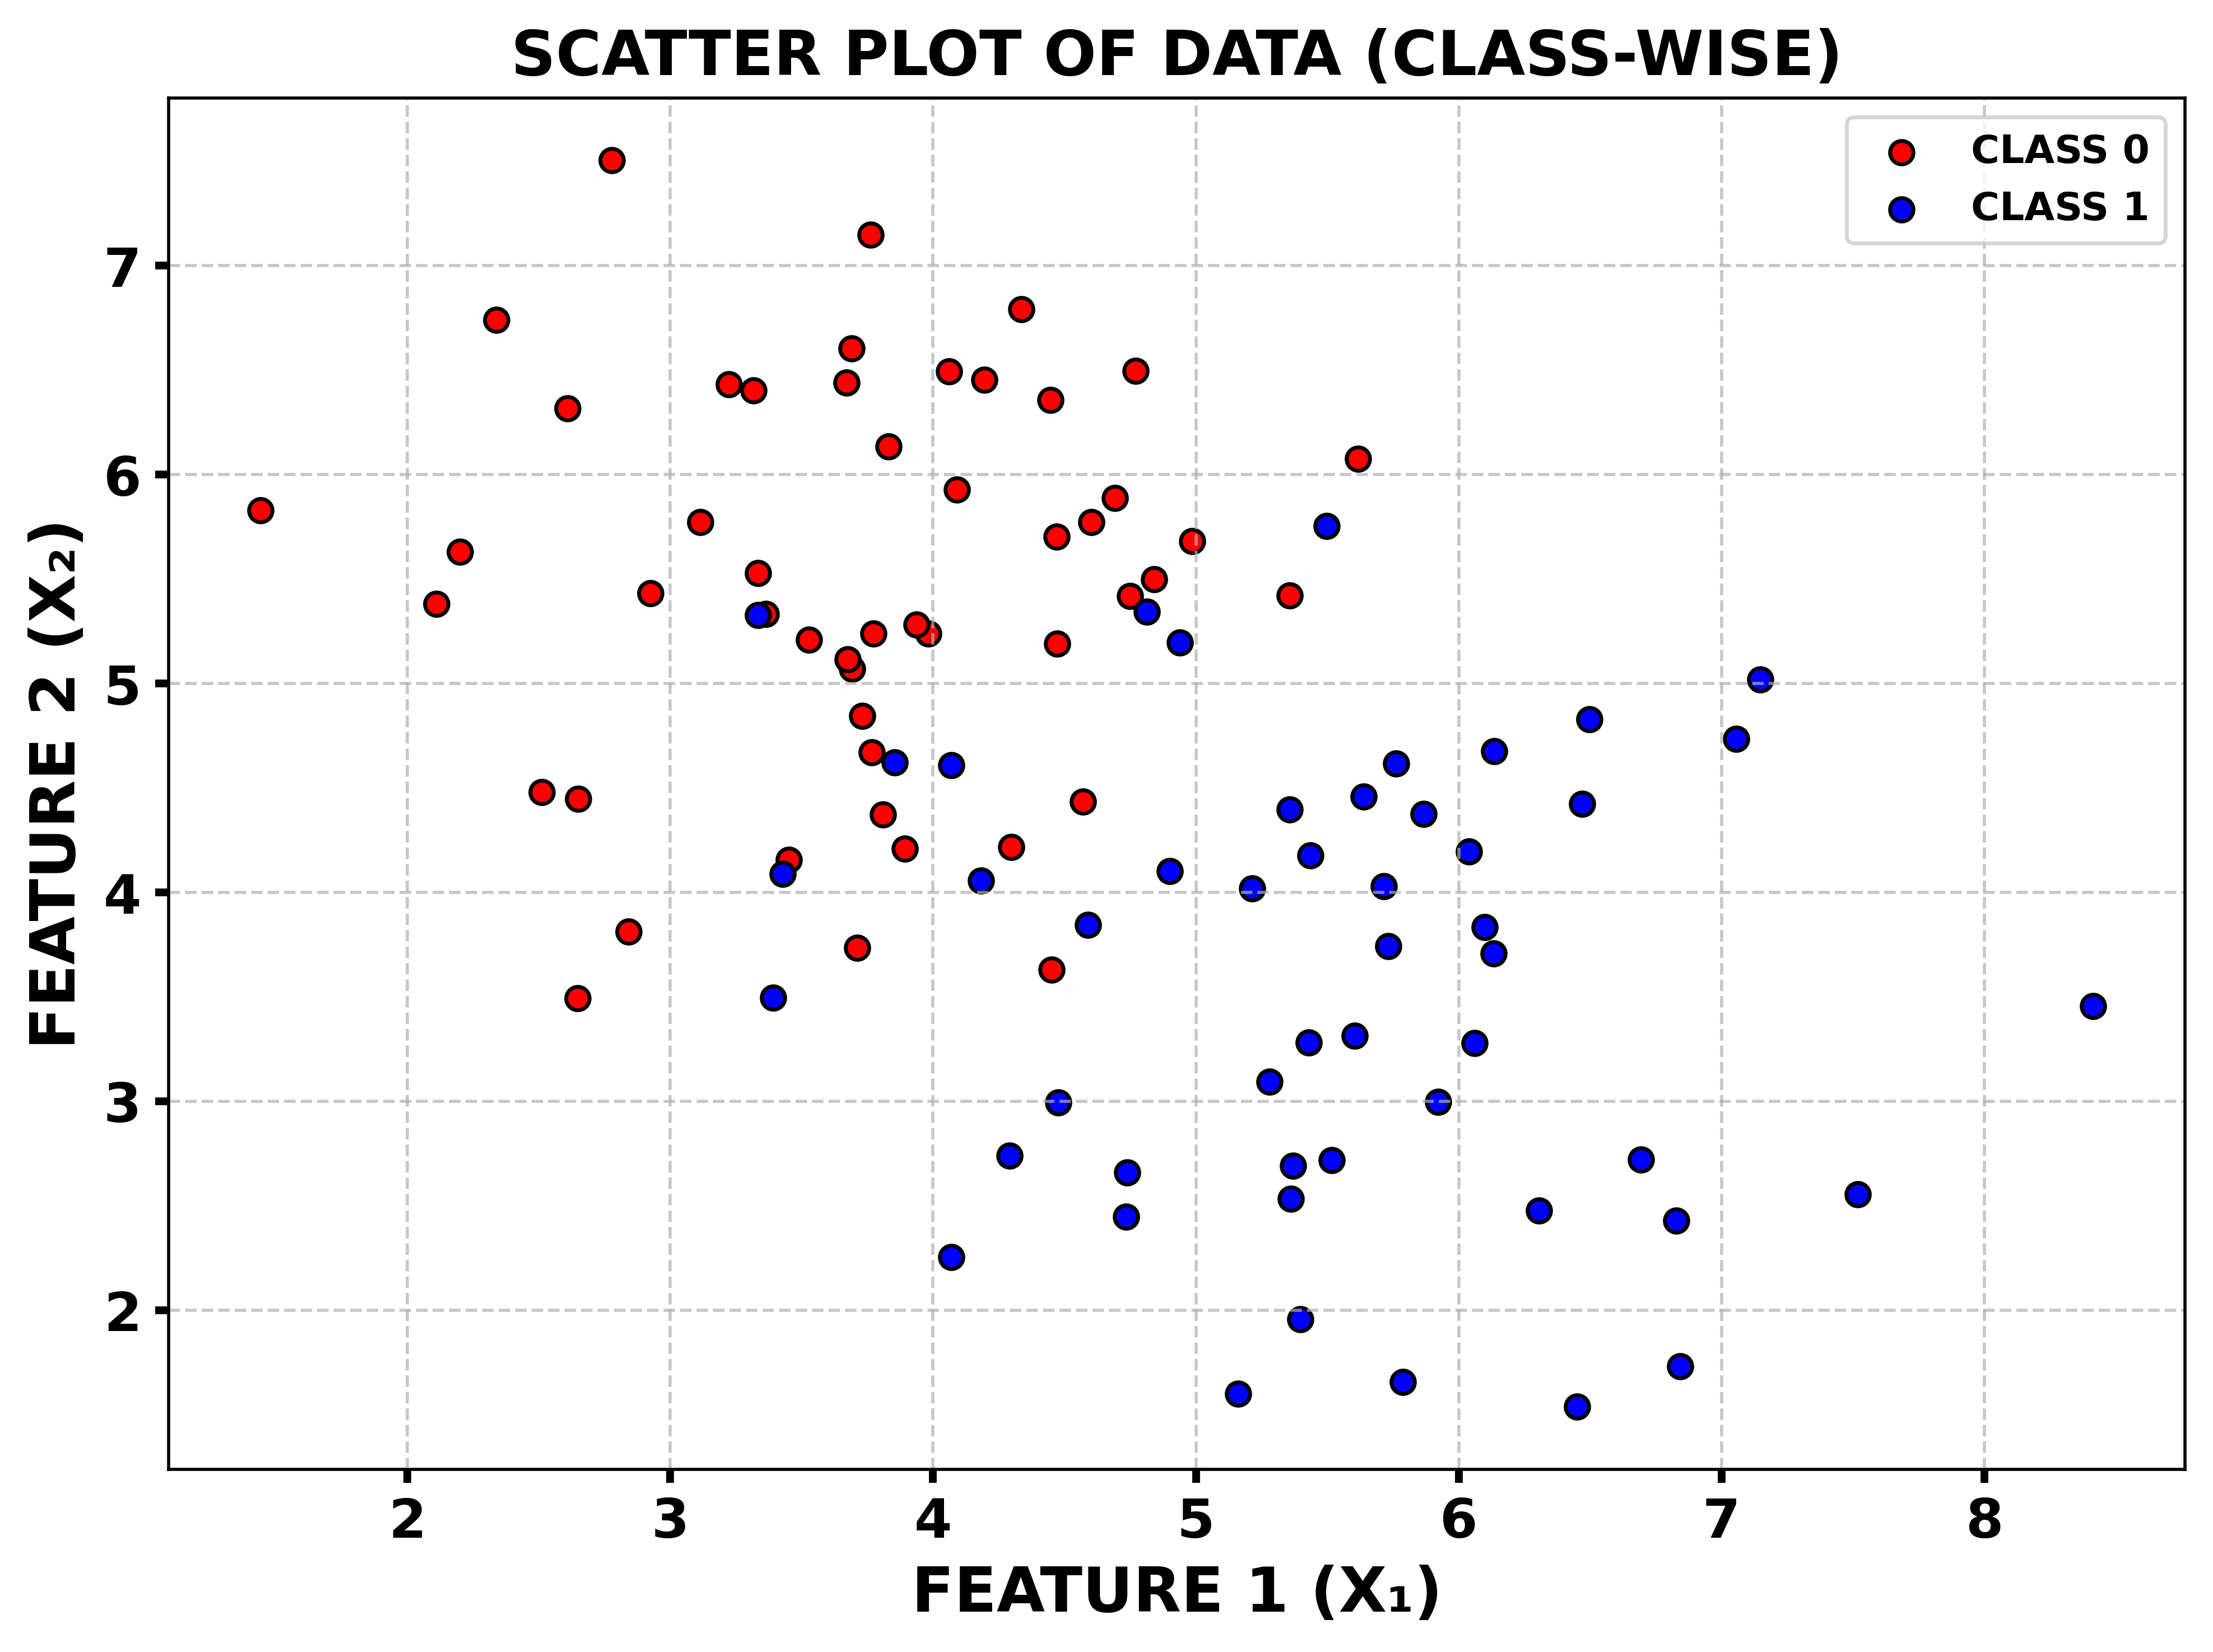

In [13]:
plt.figure(figsize = (8, 6), dpi = 500)

# PLOT CLASS 0 POINTS
plt.scatter(X_raw[y_flat == 0, 0], X_raw[y_flat == 0, 1], color = 'red', edgecolors = 'black', label = 'CLASS 0')

# PLOT CLASS 1 POINTS
plt.scatter(X_raw[y_flat == 1, 0], X_raw[y_flat == 1, 1], color = 'blue', edgecolors = 'black', label = 'CLASS 1')

plt.title('SCATTER PLOT OF DATA (CLASS-WISE)', fontsize = 16, fontweight = 'bold')
plt.xlabel("FEATURE 1 (X₁)", fontsize=16, fontweight='bold')
plt.ylabel("FEATURE 2 (X₂)", fontsize=16, fontweight='bold')

plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
    
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper right', fontsize=16, frameon=True, prop={'weight' : 'bold'})
plt.tight_layout()
plt.show()

## LOGISTIC REGRESSION CLASS DEFINITION
THIS CLASS ENCAPSULATES THE MATH AND LOGIC.

IT INCLUDES METHODS FOR SIGMOID, COST CALCULATION, GRADIENT DESCENT (TRAIN), AND PREDICTION.

In [9]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.1, iterations = 1000):
        # INITIALIZE HYPERPARAMETERS
        self.lr = learning_rate
        self.iter = iterations
        self.theta = None
        self.cost_history = []
        
    def sigmoid(self, z):
        # ACTIVATION FUNCTION
        # MATH: g(z) = 1 / (1 + e^-z)
        
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y):
        # COST FUNCTION
        # MATH: J = (-1/m) * sum(y*log(h) + (1-y)*log(1-h))
        
        m = len(y)
        # COMPUTE LINEAR COMBINATION
        z = np.dot(X, self.theta)
        # APPLY SIGMOID
        h = self.sigmoid(z)
        
        # EPSILON ADDED TO AVOID LOG(0) ERROR# EPSILON ADDED TO AVOID LOG(0) ERROR
        epsilon = 1e-15
        
         # LOG LOSS COST FUNCTION
        cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost
    
    def train(self, X, y):
        # INITIALIZE PARAMETERS (THETA) WITH ZEROS
        # SHAPE OF THETA: (n_features, 1)
        
        n_features = X.shape[1]
        self.theta = np.zeros((n_features, 1))
        self.cost_history = []    
        
        m = len(y)
        
        for i in range(self.iter):
            # HYPOTHESIS: h(x) = sigmoid(X * theta)
            z = np.dot(X, self.theta)
            
            # COMPUTE PREDICTIONS
            h = self.sigmoid(z)
            
            # GRADIENT CALCULATION
            # MATH: dJ/dTheta = (1/m) * X.T * (h - y)
            
            gradient = (1 / m) * np.dot(X.T, (h - y))
            
            # UPDATE PARAMETERS
            # MATH: theta = theta - alpha * gradient
            
            self.theta = self.theta - (self.lr * gradient)
            
            # RECORD COST
            current_cost = self.cost_function(X, y)
            self.cost_history.append(current_cost)
            
            if i % 100 == 0:
                print(f"ITERATION {i} | COST: {current_cost:.6f}")
    
    def predict_proba(self, X):
        # RETURNS PROBABILITY BETWEEN 0 AND 1
        
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        # RETURNS CLASS LABELS 0 OR 1
        return (self.predict_proba(X) >= threshold).astype(int)     

# 🛡️ THE ROLE OF EPSILON ($\epsilon$) IN COST FUNCTION

### THE MATHEMATICAL PROBLEM: LOG(0) IS UNDEFINED

> **THE ISSUE:**
> THE LOGARITHMIC FUNCTION $\log(x)$ IS NOT DEFINED FOR $x = 0$.
> AS $x$ APPROACHES 0, $\log(x)$ APPROACHES $-\infty$ (NEGATIVE INFINITY).

IN LOGISTIC REGRESSION, OUR PREDICTION $h$ IS THE OUTPUT OF THE SIGMOID FUNCTION, WHICH RANGES BETWEEN 0 AND 1.
* IF THE MODEL IS "PERFECTLY WRONG" AND PREDICTS $h = 0$ WHEN $y = 1$, THE COST TERM BECOMES $\log(0)$.
* IF THE MODEL PREDICTS $h = 1$ WHEN $y = 0$, THE TERM $\log(1-h)$ BECOMES $\log(0)$.

COMPUTATIONALLY, THIS RESULTS IN:
* **MATHEMATICAL ERROR:** $-\infty$
* **PROGRAMMING ERROR:** `NaN` (NOT A NUMBER) OR RUNTIME CRASH.

---

### THE SOLUTION: NUMERICAL STABILITY

TO PREVENT THIS CATASTROPHE, WE ADD A TINY "FUZZ FACTOR" CALLED **EPSILON** ($\epsilon$) TO THE LOGARITHM INPUT.

`epsilon = 1e-15`  (WHICH IS $0.000000000000001$)

THIS ENSURES THE VALUE INSIDE THE LOG IS NEVER EXACTLY ZERO, BUT EXTREMELY CLOSE TO IT.
* INSTEAD OF $\log(0)$, WE CALCULATE $\log(0.000000000000001)$.
* THIS GIVES A LARGE NEGATIVE NUMBER, BUT A **FINITE** ONE (APPROX -34.5), ALLOWING GRADIENT DESCENT TO CONTINUE WORKING.

---

### THE MODIFIED COST EQUATION

> **ORIGINAL COST FUNCTION:**

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$$

> **NUMERICALLY STABLE IMPLEMENTATION:**

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)}) + \epsilon) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}) + \epsilon)]$$

---

### SIGNIFICANCE & REASONING

1.  **ROBUSTNESS:** IT MAKES THE CODE "BULLETPROOF" AGAINST EDGE CASES WHERE PROBABILITIES HIT HARD 0 OR 1.
2.  **PREVENTING `NAN` PROPAGATION:** ONCE A SINGLE VALUE BECOMES `NAN` OR `INF` IN A MATRIX OPERATION, IT OFTEN INFECTS THE ENTIRE MATRIX, RUINING THE TRAINING PROCESS. EPSILON STOPS THIS AT THE SOURCE.
3.  **NEGLIGIBLE IMPACT:** SINCE $10^{-15}$ IS SO SMALL, IT DOES NOT CHANGE THE ACCURACY OF THE COST CALCULATION IN ANY MEANINGFUL WAY FOR HUMAN INTERPRETATION.

## TRAINING THE MODEL 
WE INSTANTIATE THE CLASS WITH LR=0.1 AND TRAIN IT.

In [10]:
# TRAIN MODEL

model = LogisticRegression(learning_rate = 0.1, iterations = 1000)
model.train(X_data, y_data)

print(f"FINAL COST --> {model.cost_history[-1]:.6f}")
print(f"FINAL LEARNING PARAMETERS (THETA) --> {model.theta}")

ITERATION 0 | COST: 0.692110
ITERATION 100 | COST: 0.604679
ITERATION 200 | COST: 0.541553
ITERATION 300 | COST: 0.494832
ITERATION 400 | COST: 0.459284
ITERATION 500 | COST: 0.431505
ITERATION 600 | COST: 0.409273
ITERATION 700 | COST: 0.391109
ITERATION 800 | COST: 0.376004
ITERATION 900 | COST: 0.363250
FINAL COST --> 0.352443
FINAL LEARNING PARAMETERS (THETA) --> [[ 0.31408539]
 [ 3.76824158]
 [-4.01198758]]


## CONVERGENCE GRAPH

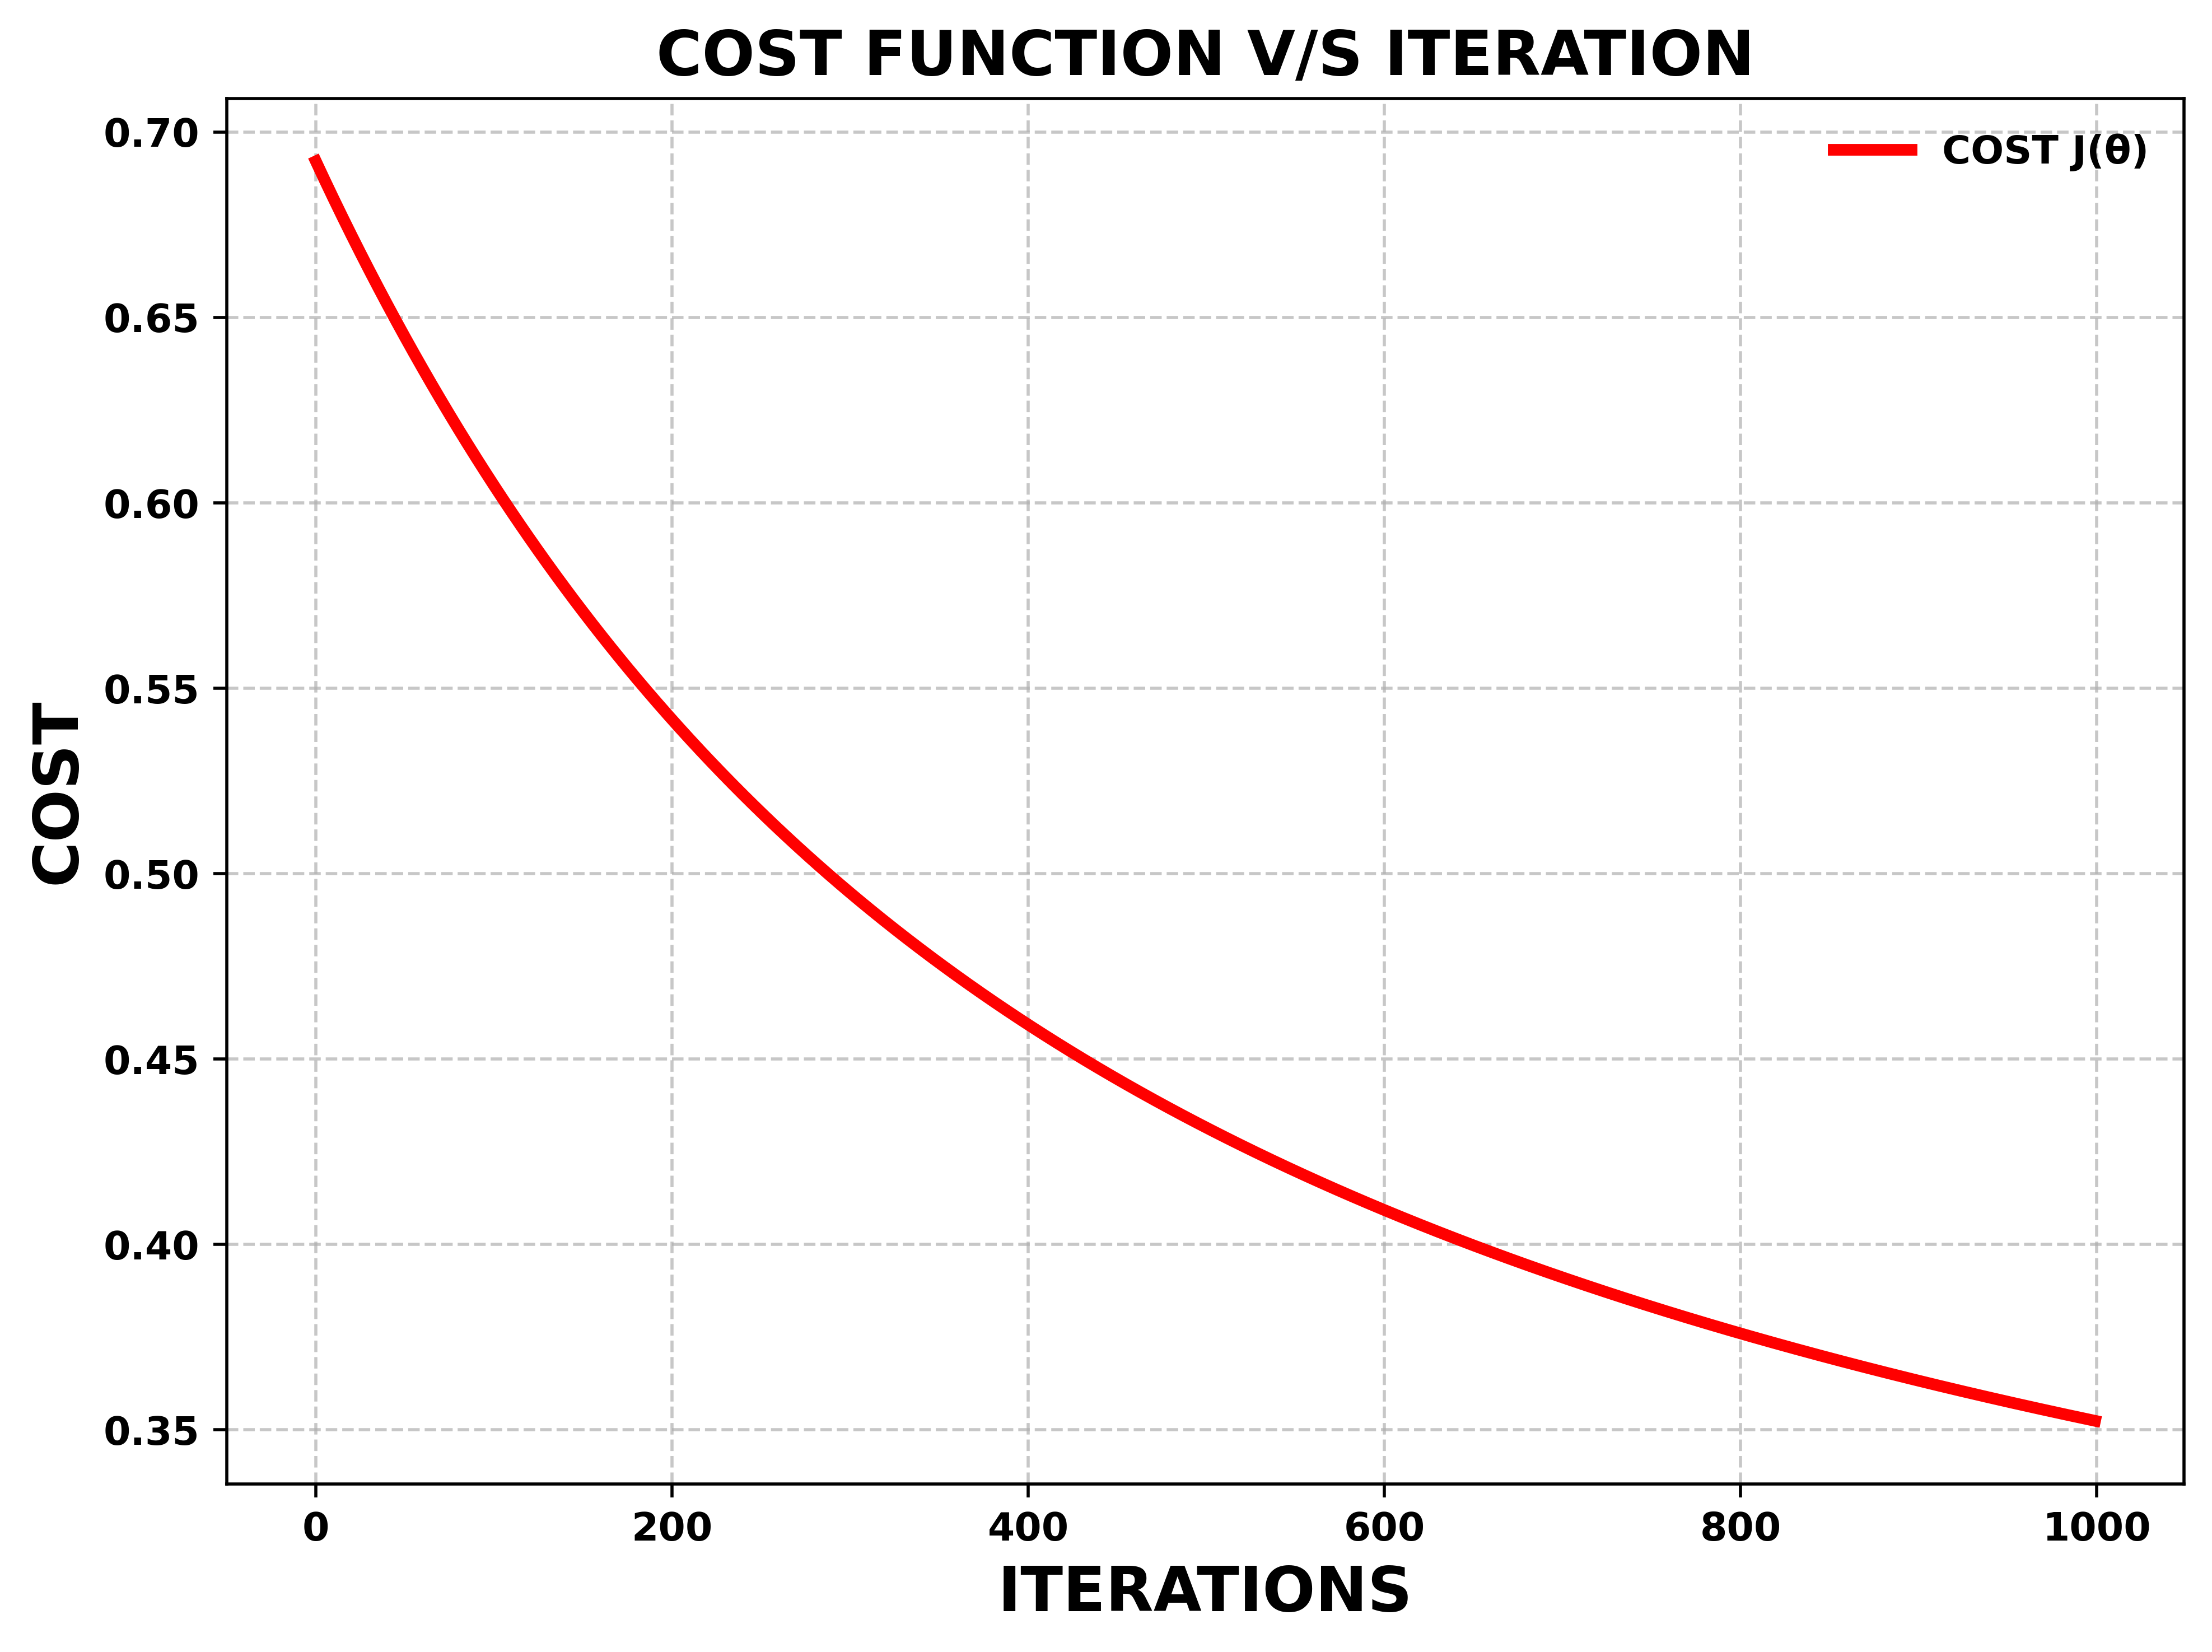

In [11]:
# PLOT COST FUNCTION
plt.figure(figsize = (8, 6), dpi = 500)
plt.plot(model.cost_history, color = 'red', linewidth = 3, label = 'COST J(θ)')
plt.title("COST FUNCTION V/S ITERATION", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST", fontsize=16, fontweight='bold')

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=16, frameon=False, prop={'weight': 'bold'})
plt.tight_layout()
plt.show()

## VISUALIZING DECISION BOUNDARY
WE PLOT THE ORIGINAL DATA AND THE CALCULATED SIGMOID BOUNDARY.

NOTE: WE PLOT AGAINST THE RAW X VALUES FOR CLARITY, BUT USE NORMALIZED VALUES FOR PREDICTION.

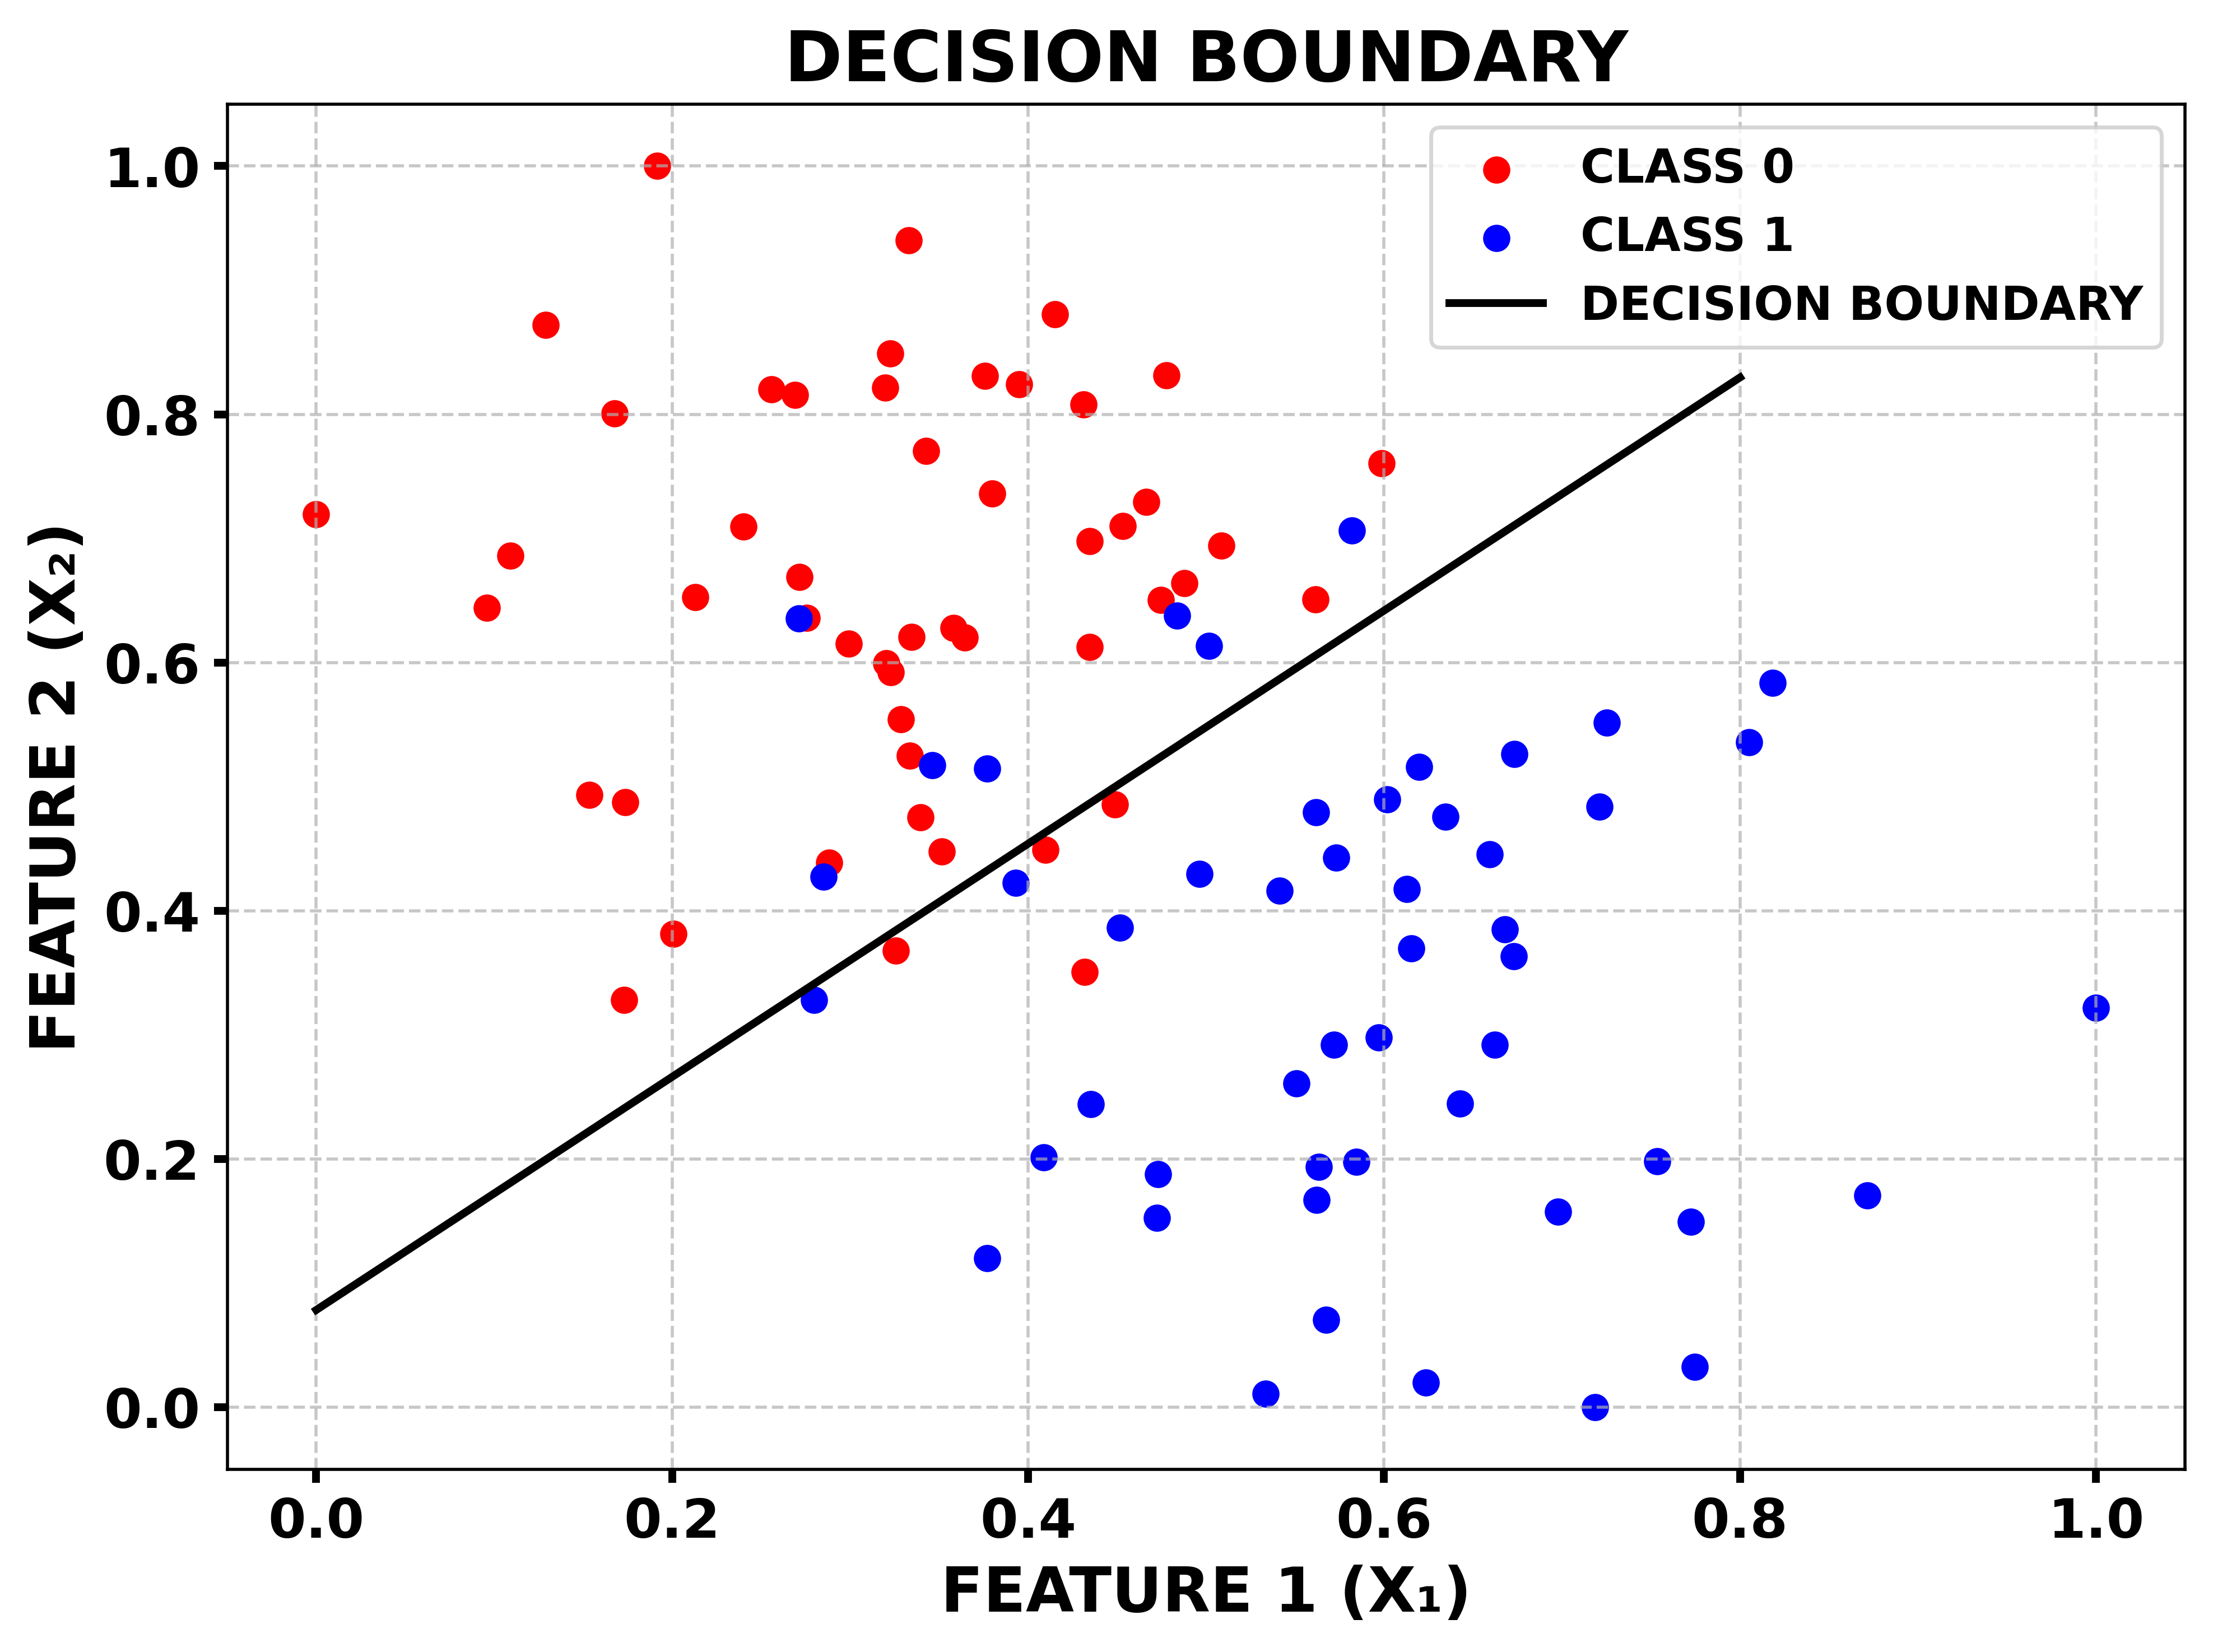

In [38]:
plt.figure(figsize=(8, 6), dpi=500)

label_class_1_shown = False
label_class_0_shown = False

for i in range(len(y_data)):
    if y_data[i] == 1:
        if not label_class_1_shown:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='blue', label='CLASS 1')
            label_class_1_shown = True
        else:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='blue')
    else:
        if not label_class_0_shown:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='red', label='CLASS 0')
            label_class_0_shown = True
        else:
            plt.scatter(X_data[i, 1], X_data[i, 2], color='red')

x_vals = np.linspace(0, 0.8, 100)
y_vals = -(model.theta[0] + model.theta[1] * x_vals) / model.theta[2]
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='DECISION BOUNDARY')

plt.xlabel("FEATURE 1 (X₁)", fontsize=16, fontweight='bold')
plt.ylabel("FEATURE 2 (X₂)", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')
plt.title("DECISION BOUNDARY", fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

legend = plt.legend(loc='upper right', fontsize=12, frameon=True)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()

# 📉 DECODING THE DECISION BOUNDARY MATHS

**"WHY DID WE ADD, MULTIPLY AND DIVIDE HERE?"** 

`y_vals = -(model.theta[0] + model.theta[1] * x_vals) / model.theta[2]`

> THE SHORT ANSWER: 

**WE ARE SOLVING A LINEAR EQUATION ($Ax + By + C = 0$) FOR $Y$.**

BELOW IS THE STEP-BY-STEP "BEHIND THE HOOD" EXPLANATION.

---

### 1. THE MATHEMATICAL FOUNDATION

IN LOGISTIC REGRESSION, THE MODEL PREDICTS A PROBABILITY USING THE **SIGMOID FUNCTION**:

$$h_\theta(x) = g(z) = \frac{1}{1 + e^{-z}}$$

THE "DECISION BOUNDARY" IS THE LINE THAT SEPARATES THE TWO CLASSES (CLASS 0 AND CLASS 1).
* WE CLASSIFY AS **1** IF $h_\theta(x) \geq 0.5$
* WE CLASSIFY AS **0** IF $h_\theta(x) < 0.5$

THE CRITICAL POINT IS EXACTLY AT **0.5**.
FOR THE SIGMOID FUNCTION TO OUTPUT **0.5**, THE INPUT $z$ MUST BE **0**.

$$z = \theta^T X = 0$$

THIS EQUATION ($\theta^T X = 0$) DEFINES OUR BOUNDARY.

---

### 2. THE ALGEBRAIC DERIVATION (THE "WHY")

LET'S EXPAND $\theta^T X = 0$ FOR A DATASET WITH **TWO FEATURES** ($X_1$ AND $X_2$).
YOUR MATRIX $X$ HAS 3 COLUMNS:
1.  **BIAS (INTERCEPT):** $1$ (ASSOCIATED WITH $\theta_0$)
2.  **FEATURE 1:** $X_1$ (ASSOCIATED WITH $\theta_1$)
3.  **FEATURE 2:** $X_2$ (ASSOCIATED WITH $\theta_2$)

THE EQUATION FOR THE BOUNDARY BECOMES:

$$\theta_0 \cdot (1) + \theta_1 \cdot (X_1) + \theta_2 \cdot (X_2) = 0$$

NOW, WE WANT TO PLOT THIS ON A 2D GRAPH.
* **X-AXIS** REPRESENTS **FEATURE 1** ($X_1$).
* **Y-AXIS** REPRESENTS **FEATURE 2** ($X_2$).

TO PLOT A LINE, WE NEED IT IN THE FORM $y = mx + c$. <br>
SO, WE MUST SOLVE THE EQUATION ABOVE FOR $X_2$ (WHICH IS OUR $y$ VARIABLE).

> **STEP 1: KEEP $X_2$ ON THE LEFT, MOVE EVERYTHING ELSE TO THE RIGHT**
> $$\theta_2 \cdot X_2 = - (\theta_0 + \theta_1 \cdot X_1)$$

> **STEP 2: ISOLATE $X_2$ BY DIVIDING BY $\theta_2$**
> $$X_2 = \frac{- (\theta_0 + \theta_1 \cdot X_1)}{\theta_2}$$

THIS IS THE EXACT MATHEMATICAL REASON FOR THE CODE LINE YOU ASKED ABOUT!

---

### 3. CODE LINE-BY-LINE BREAKDOWN

`x_vals = np.linspace(0, 1, 100)`
> **WHAT IT DOES:** CREATES 100 POINTS FOR THE **X-AXIS** (FEATURE 1).
> 
> **WHY:** SINCE WE NORMALIZED DATA BETWEEN 0 AND 1, WE GENERATE POINTS COVERING THAT WHOLE SPAN TO DRAW A SMOOTH LINE.

`y_vals = -(model.theta[0] + model.theta[1] * x_vals) / model.theta[2]`
> **WHAT IT DOES:** CALCULATES THE CORRESPONDING **Y-AXIS** (FEATURE 2) VALUES.
> **THE MAPPING:**
> * `model.theta[0]` = $\theta_0$ (BIAS)
> * `model.theta[1] * x_vals` = $\theta_1 \cdot X_1$
> * `model.theta[2]` = $\theta_2$ (DIVISOR)
>
> **VISUALIZATION:** THIS TRANSFORMS THE ABSTRACT HYPERPLANE FORMULA INTO COORDINATES WE CAN PLOT ON A SCREEN.

`plt.plot(x_vals, y_vals, ...)`
> **WHAT IT DOES:** CONNECTS THESE CALCULATED $(X, Y)$ PAIRS TO DRAW THE STRAIGHT BLACK LINE SEPARATING RED AND BLUE DOTS.

---

### 4. VISUAL ILLUSTRATION

IMAGINE A 3D LANDSCAPE WHERE:
* $X$ AND $Y$ AXES ARE YOUR FEATURES.
* THE $Z$-AXIS IS THE PROBABILITY (HEIGHT).

THE SIGMOID FUNCTION CREATES AN "S-SHAPED CLIFF".
THE **DECISION BOUNDARY** IS LIKE SLICING THAT LANDSCAPE AT EXACTLY HEIGHT = 0.5.

WHEN WE LOOK AT THE SCATTER PLOT FROM ABOVE (TOP-DOWN VIEW), THAT "SLICE" LOOKS LIKE A STRAIGHT LINE CUTTING THROUGH YOUR DATA.

* **IF $\theta_2$ WAS 0:** WE COULDN'T DIVIDE BY IT. THIS WOULD MEAN FEATURE 2 DOESN'T MATTER, AND THE LINE WOULD BE VERTICAL.
* **THE "-" SIGN:** COMES FROM MOVING TERMS TO THE OTHER SIDE OF THE EQUATION.